In [1]:
import pandas as pd

df = pd.read_csv('D:\WORK\Project_Year4\Machine_Learning_for_PM_and_PdM\Chapter13_DT_RF_Ensemble\Boiler_emulator_dataset.txt')
df['Fault'] = df['Class'].apply(lambda x: 0 if x == 'Nominal' else 1)
print(df.head())

   Fuel_Mdot  Tair  Treturn     Tsupply  Water_Mdot Condition      Class  \
0          1   283    333.0  363.574744         3.0    %=0.05       Lean   
1          1   283    333.0  362.349517         3.0     %=0.1    Nominal   
2          1   283    333.0  361.216941         3.0    %=0.15  ExcessAir   
3          1   283    333.0  360.166890         3.0    %=0.20  ExcessAir   
4          1   283    333.0  359.190662         3.0    %=0.25  ExcessAir   

   Fault  
0      1  
1      0  
2      1  
3      1  
4      1  


In [ ]:
from sklearn.model_selection import train_test_split

feature_cols = ['Fuel_Mdot', 'Tair', 'Treturn', 'Tsupply', 'Water_Mdot']
X = df[feature_cols]
y = df['Fault']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

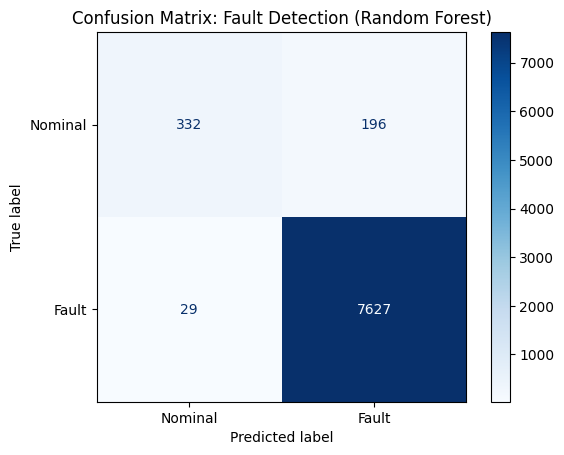

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Nominal', 'Fault'])

disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Fault Detection (Random Forest)')
plt.show()
